In [1]:
from AhpAnpLib import inputs_AHPLib as input
from AhpAnpLib import structs_AHPLib as str
from AhpAnpLib import calcs_AHPLib as calc

In [2]:
#create model
lunchModel=str.Model("Lunch")
print(lunchModel)


Model Name: Lunch
Type:pairwise
Nodes: []
 Clusters: []
 Node Connections: []
 Cluster Connections: []


In [3]:
#create nodes
goal_node=str.Node("GoalNode",0)

quality=str.Node("1Quality",1)
price=str.Node("2Price",2)
menu=str.Node("3Menu",3)
speed=str.Node("4Speed",4)

alt1=str.Node("1Primanti",5)
alt2=str.Node("2Panera",6)
alt3=str.Node("3Piada",7)


In [4]:
#create clusters
cluster0=str.Cluster("1Goal",0)
cluster1=str.Cluster("2Criteria",1)
cluster2=str.Cluster("3Alternatives",2)

In [5]:
#add nodes to clusters
cluster0.addNode2Cluster(goal_node) 
cluster1.addMultipleNodes2Cluster(menu,quality,price,speed)
cluster2.addMultipleNodes2Cluster(alt1,alt2,alt3)


In [6]:
#print cluster contents to confirm that the assignment of nodes was the desired
cluster0.printWithNodes()
cluster1.printWithNodes()
cluster2.printWithNodes()

Cluster: 1Goal with nodes: [GoalNode order: 0]

Cluster: 2Criteria with nodes: [3Menu order: 3, 1Quality order: 1, 2Price order: 2, 4Speed order: 4]

Cluster: 3Alternatives with nodes: [1Primanti order: 5, 2Panera order: 6, 3Piada order: 7]



In [7]:
#add clusters to model 
lunchModel.addMultipleClusters2Model(cluster0,cluster1,cluster2)

#print
lunchModel.printStruct()

_________________________MODEL STRUCTURE_________________________
Name: Lunch
Type: pairwise

____________________________NODES_______________________________
GoalNode order: 0
1Quality order: 1
2Price order: 2
3Menu order: 3
4Speed order: 4
1Primanti order: 5
2Panera order: 6
3Piada order: 7
____________________________CLUSTERS____________________________
1Goal order: 0
2Criteria order: 1
3Alternatives order: 2
_________________________NODE CONNECTIONS___________________________
No connections from GoalNode
No connections from 1Quality
No connections from 2Price
No connections from 3Menu
No connections from 4Speed
No connections from 1Primanti
No connections from 2Panera
No connections from 3Piada
_________________________CLUSTER CONNECTIONS__________________
No connections from 1Goal
No connections from 2Criteria
No connections from 3Alternatives


In [8]:
#set up node connections from Goal Node to all the nodes of the 2Criteria cluster
lunchModel.addNodeConnectionFromNodeToAllNodesOfCluster("GoalNode","2Criteria")
#set up node connections from all the nodes of the 2Criteria cluster to all the nodes of the cluster 3Alternatives
lunchModel.addNodeConnectionFromAllNodesToAllNodesOfCluster("2Criteria","3Alternatives")

# Print out model
lunchModel.printStruct()

_________________________MODEL STRUCTURE_________________________
Name: Lunch
Type: pairwise

____________________________NODES_______________________________
GoalNode order: 0
1Quality order: 1
2Price order: 2
3Menu order: 3
4Speed order: 4
1Primanti order: 5
2Panera order: 6
3Piada order: 7
____________________________CLUSTERS____________________________
1Goal order: 0
2Criteria order: 1
3Alternatives order: 2
_________________________NODE CONNECTIONS___________________________
Connections from node GoalNode order: 0
 to: 3Menu order: 3
 to: 1Quality order: 1
 to: 2Price order: 2
 to: 4Speed order: 4
Connections from node 1Quality order: 1
 to: 1Primanti order: 5
 to: 2Panera order: 6
 to: 3Piada order: 7
Connections from node 2Price order: 2
 to: 1Primanti order: 5
 to: 2Panera order: 6
 to: 3Piada order: 7
Connections from node 3Menu order: 3
 to: 1Primanti order: 5
 to: 2Panera order: 6
 to: 3Piada order: 7
Connections from node 4Speed order: 4
 to: 1Primanti order: 5
 to: 2Panera

In [9]:
# export questionnaire
input.export4ExcelQuestFull(lunchModel,"lunchModel_Excel_empty.xlsx",True)

x: 0.268, y: 0.294
x: 0.846, y: 0.361
x: 0.352, y: 0.296
x: 0.101, y: 0.301
x: 0.453, y: 0.358
x: 0.279, y: 0.297
x: 0.842, y: 0.253


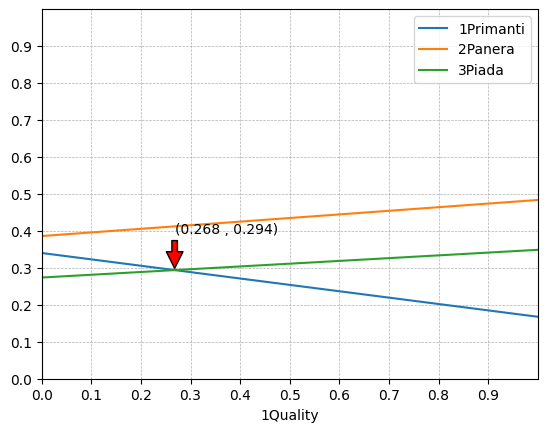

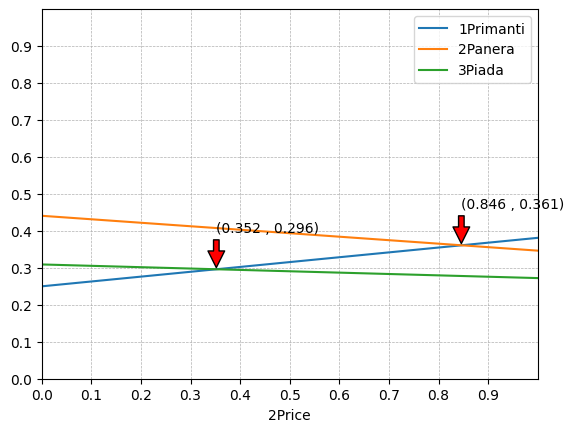

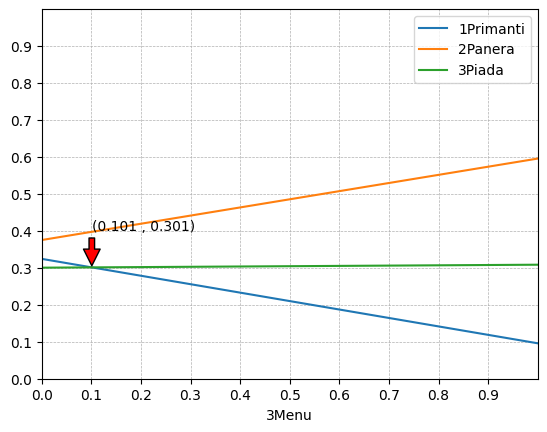

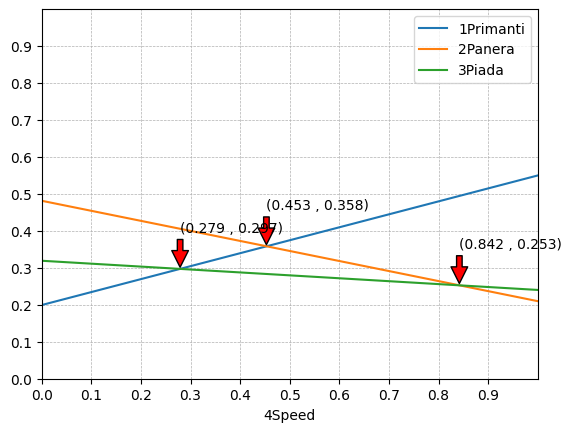

In [10]:
#import questionnaire and calculate and export results
inputFilePath="lunchModel_Excel_filledIn.xlsx"
outputFilePath="lunchModel_Results.xlsx"

#input.importFromExcel(lunchModel,inputFilePath,0)
calc.calcAHPMatricesSave2File(lunchModel,inputFilePath,outputFilePath,True,True,True,False)

#sensitivity analysis
calc.sensitivityCellSupermatrixPlot(lunchModel,"3Alternatives",outputFilePath,False,"1Quality","2Price","3Menu","4Speed")
